In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score


In [253]:
insurance_dataset=pd.read_csv("/content/insurance.csv")


In [254]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [255]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [256]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [257]:
# Checking for missing values

In [258]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<ipython-input-259-55cd15a5a482>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset["age"])


Text(0.5, 1.0, 'AGe distribution')

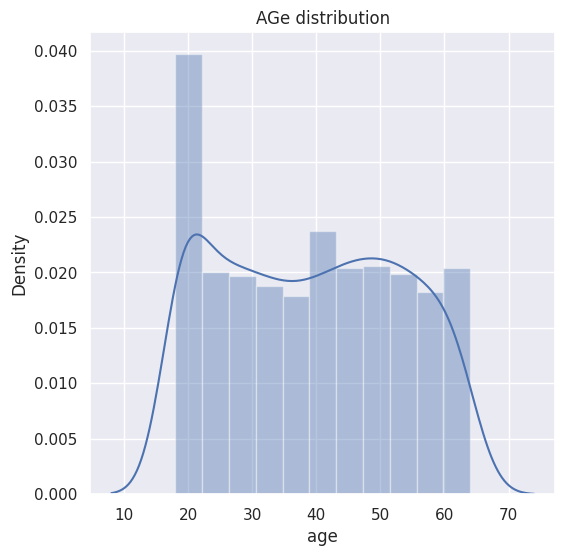

In [259]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset["age"])
plt.title("AGe distribution")


In [260]:
# bmi

<ipython-input-261-cbc17adaabaa>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset["bmi"])


Text(0.5, 1.0, 'BMI')

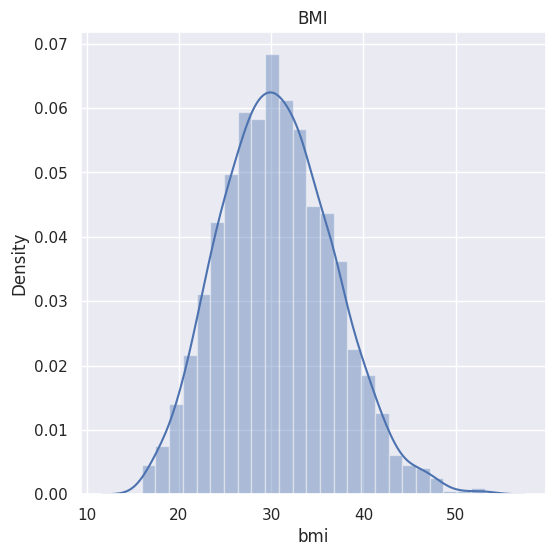

In [261]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset["bmi"])
plt.title("BMI")


<Axes: >

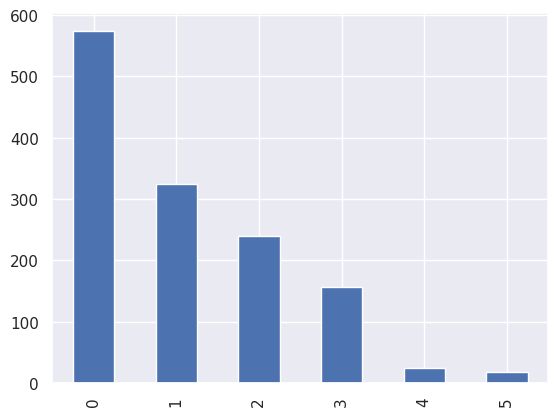

In [262]:
insurance_dataset['children'].value_counts().sort_index().plot(kind='bar')

In [263]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

<Axes: xlabel='smoker', ylabel='count'>

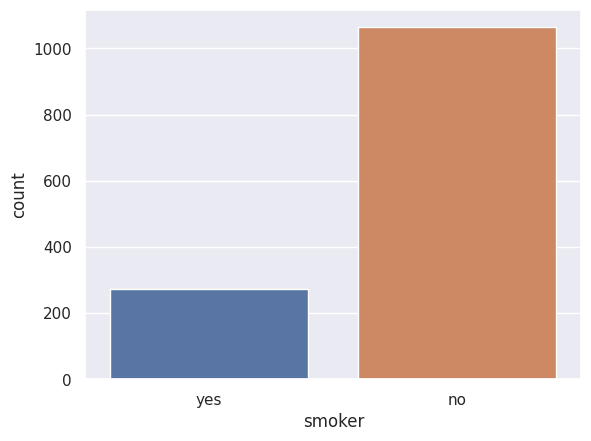

In [264]:
sns.countplot(x="smoker",data=insurance_dataset)

In [265]:
insurance_dataset.replace({"region":{"southwest":1,"southeast":0,"northeast":2,"northwest":3}},inplace=True)

In [266]:
insurance_dataset.replace({"sex":{"male":0,"female":1}},inplace=True)

In [267]:
insurance_dataset.replace({"smoker":{"yes":1,"no":0}},inplace=True)

In [268]:
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3,10600.54830
1334,18,1,31.920,0,0,2,2205.98080
1335,18,1,36.850,0,0,0,1629.83350
1336,21,1,25.800,0,0,1,2007.94500


In [269]:
x=insurance_dataset.drop(columns="charges",axis=1)

In [270]:
y=insurance_dataset["charges"]

In [271]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,1
1,18,0,33.770,1,0,0
2,28,0,33.000,3,0,0
3,33,0,22.705,0,0,3
4,32,0,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3
1334,18,1,31.920,0,0,2
1335,18,1,36.850,0,0,0
1336,21,1,25.800,0,0,1


In [272]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [297]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.4)

In [309]:
np.random.seed(104)
model=Lasso()


In [310]:
model.fit(x,y)

Lasso()

In [311]:
train_data_preds=model.predict(X_train)

In [312]:
test_data_preds=model.predict(X_test)

In [313]:
train_accuracy=r2_score(Y_train,train_data_preds)

In [314]:
test_accuracy=r2_score(Y_test,test_data_preds)

In [315]:
train_accuracy,test_accuracy

(0.7320651081234593, 0.7728479001272174)

In [316]:
input_data=[19,	1,	27.900,	0	,1,	1	]#28,male,33,3,no,southeast
Input_data_as_numpy_array=np.asarray(input_data)

In [317]:
input_data_reshaped=Input_data_as_numpy_array.reshape(1,-1)

In [318]:
prediction=model.predict(input_data_reshaped)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [319]:
prediction

array([25536.42352388])